# Importing libraries and Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re # used to keep only integer number in cell
%matplotlib inline
plt.rcParams['figure.figsize']=18,5
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

The data doesn't contain any null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


"Unnamed: 0 " column is repeated and doesn't give any useful information, so it will be dropped. Besides, "Ram" and "Weight" have to be cleaned to become a numeric values.

In [6]:
df.duplicated().sum()

0

In [7]:
df=df.drop("Unnamed: 0",axis=1)

In [8]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [9]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [12]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038733,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


# EDA of Laptop Price Prediction Dataset

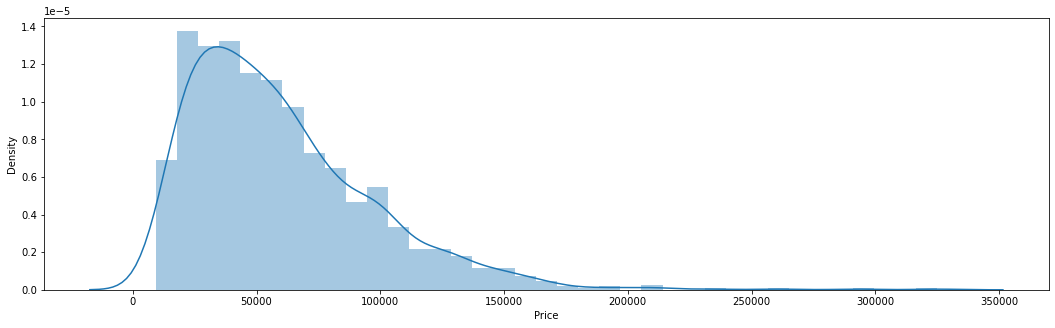

In [13]:
# Distribution of target column
sns.distplot(df["Price"])
plt.show()

The graph shows target distribution is skewed and it is obvious that laptops with low prices are sold more than expensive ones.

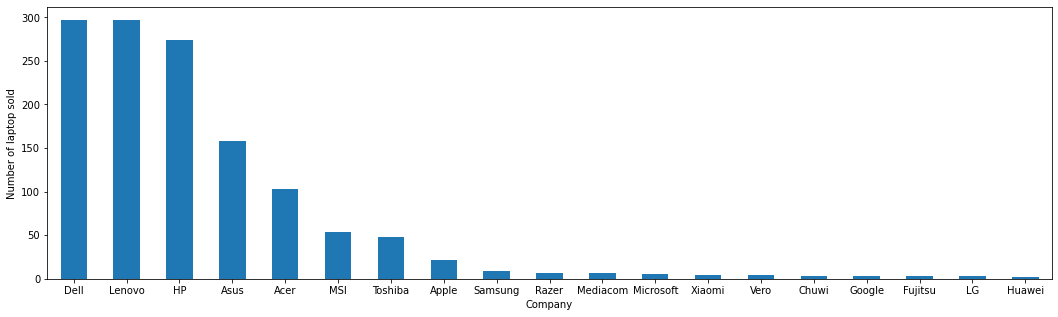

In [14]:
# Company column
ax=df["Company"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Company")
plt.ylabel("Number of laptop sold")
plt.show()

The major categories present are Dell, Lenovo, HP, Asus.

<AxesSubplot:xlabel='Company', ylabel='Price'>

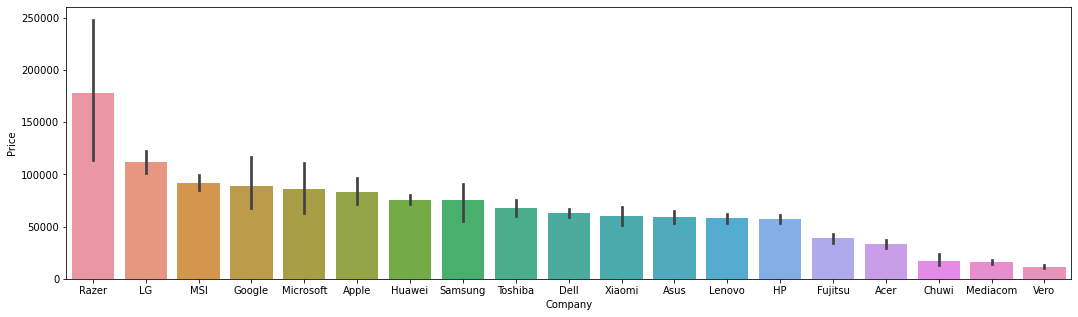

In [15]:
# Company column with Target
order = df.groupby(["Company"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x='Company', y='Price', data=df, order=order)

The major sold categories are in the budget range. On the contrary, least sold categories are the most expensive.

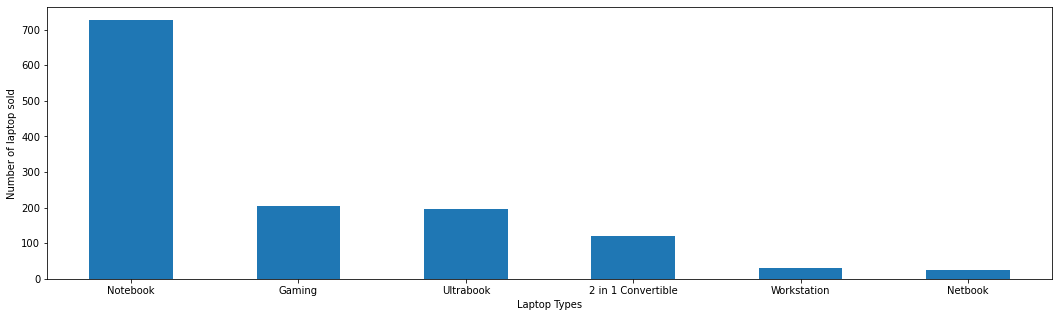

In [16]:
#Type of laptop
ax=df["TypeName"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Laptop Types")
plt.ylabel("Number of laptop sold")
plt.show()

Major preferfered laptop type is Notebook

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

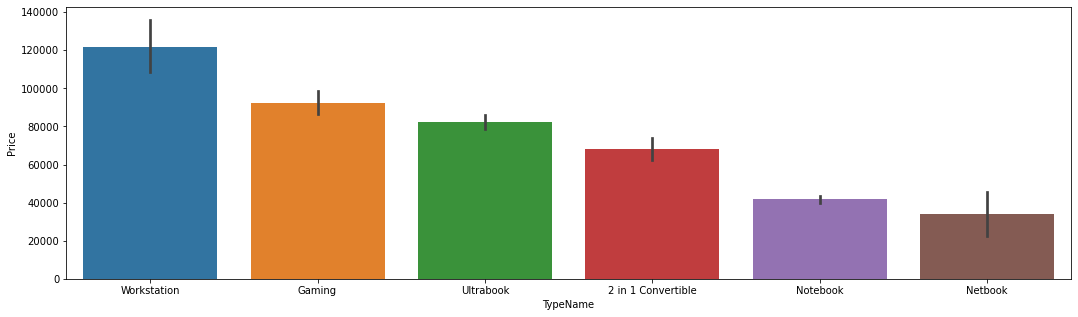

In [17]:
# Type of laptop column with Target
order = df.groupby(["TypeName"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x='TypeName', y='Price', data=df, order=order)

Notebook is under budget range. For that, it is the most preferable  type

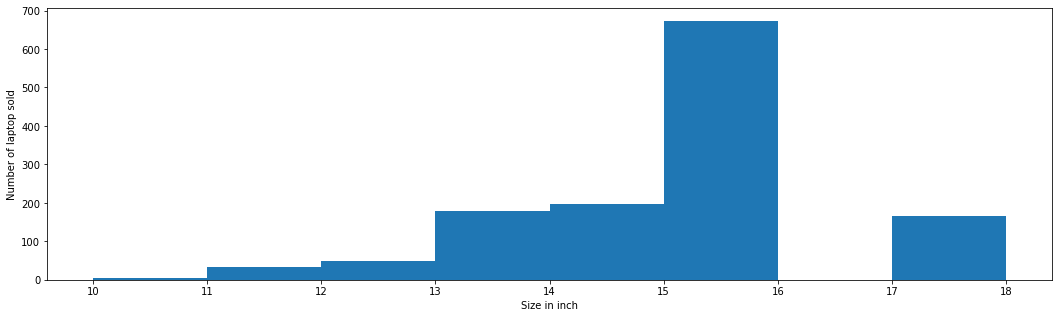

In [18]:
# laptop size in inches
fig,ax=plt.subplots()
ax.hist(df["Inches"],bins=[10,11,12,13,14,15,16,17,18])
plt.xlabel("Size in inch")
plt.ylabel("Number of laptop sold")
plt.show()

Laptops with 15-16 inches are the most sold ones

<AxesSubplot:xlabel='Inches', ylabel='Price'>

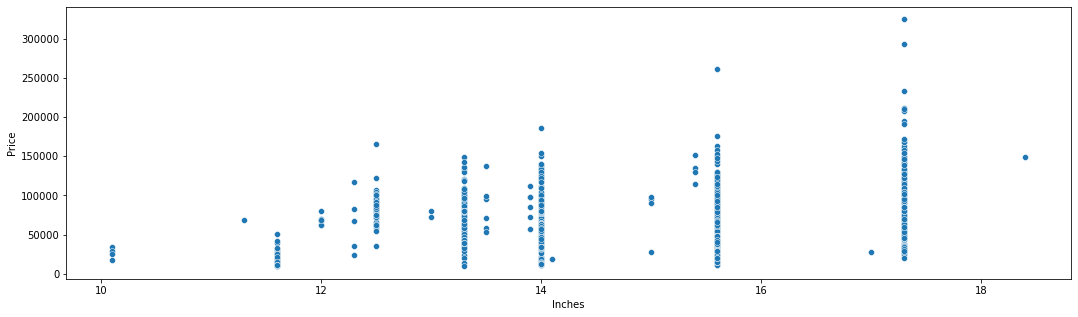

In [19]:
# laptop size in inches column with Target
sns.scatterplot(x="Inches",y="Price",data=df)

There is a slight relationship between the price and laptop size.

# Feature Engineering
####  This process is used to convert raw data to meaningful information

In [20]:
# Screen Resolution
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Screen resolution contains lots of information.

All value gives information related to the presence of an IPS panel, are a laptop touch screen or not, and the X-axis and Y-axis screen resolution. So, data will be extracted to 3 new columns in the dataset.

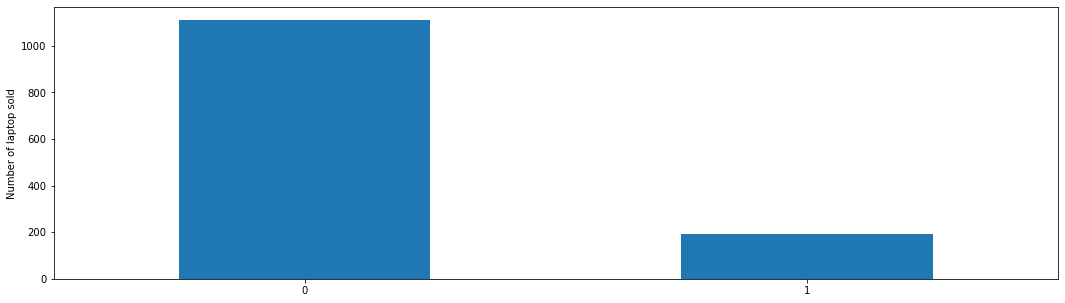

In [21]:
# Touchscreen
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)
df["Touchscreen"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Number of laptop sold")
plt.show()

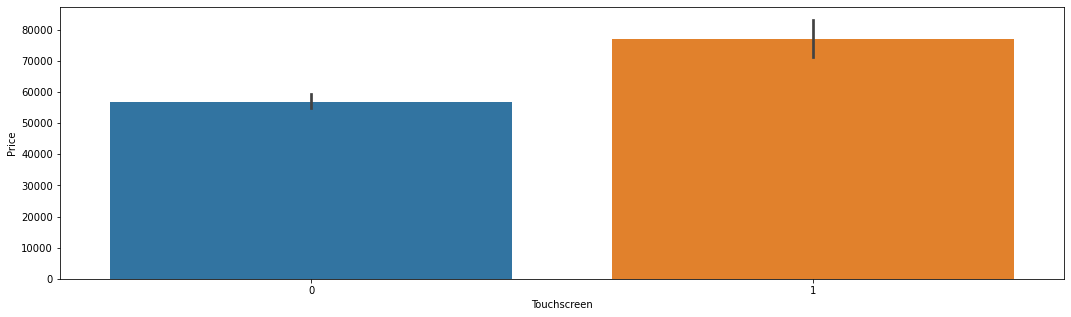

In [22]:
# Touchscreen with Target
sns.barplot(x="Touchscreen",y="Price",data=df)
plt.show()

Touchscreen laptops are more expensive and less sold

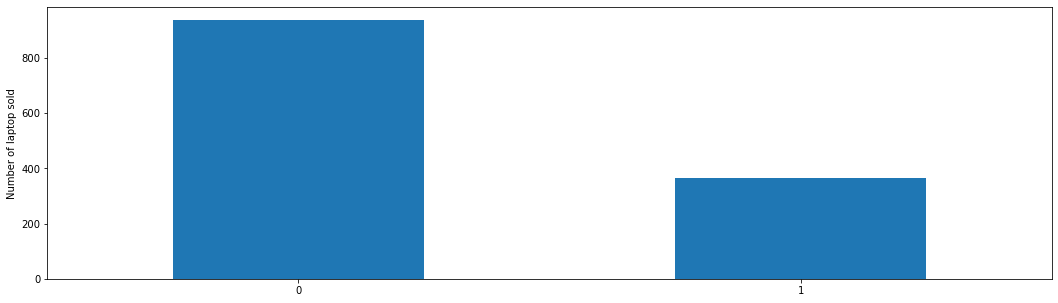

In [23]:
# IPS 
df["IPS"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)
df["IPS"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Number of laptop sold")
plt.show()

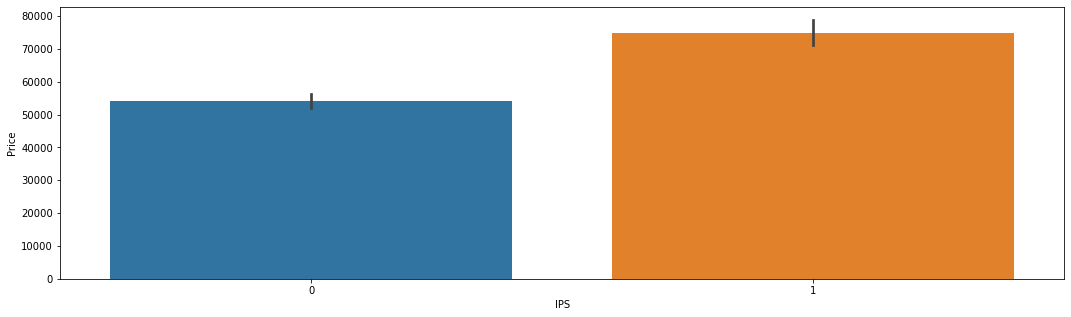

In [24]:
# IPS with Target
sns.barplot(x="IPS",y="Price",data=df)
plt.show()

The laptops with IPS channel are present less in the data but by observing the relationship against the price of IPS channel laptops are high.

### Extract X-axis and Y-axis screen resolution dimensions

In [25]:
df["ScreenResolution"].str.split("x",n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [26]:
# Both the dimension are present at end of a string and separated with a cross sign (x). 
# So first data will split the string with space and access the last string from the list. 
# Then will split the string with a cross sign and access the zero and first index for X and Y-axis dimensions.
def findXresolution(s):
    return s.split()[-1].split("x")[0]
def findYresolution(s):
    return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [28]:
# Adding new feature: Pixel per inches(PPI)
# PPI=diagonal in pixels / diagonal in inches
# Diagonal=(width^2+height^2)^1/2
# Referance: https://www.calculatorsoup.com/calculators/technology/ppi-calculator.php
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [29]:
df.corr()["Price"].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

We can drop the extra columns which are not of use. 

In [30]:
df=df.drop(["X_res","Y_res","Inches","ScreenResolution"],axis=1)

In [31]:
# Cpu
print(df["Cpu"].value_counts())
print(df["Cpu"].nunique())

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64
118


CPU column has 118 different categories, and the information it gives is about preprocessors in laptops and speed.

In [32]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [33]:
def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == "Intel Core i7" or cpu_name == "Intel Core i5" or cpu_name == "Intel Core i3":
        return cpu_name
    elif cpu_name.split()[0]=="Intel":
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
df["Cpu_brand"]=df["Cpu"].apply(lambda x:fetch_processor(x))

First three words from the strings have been extracted. So, there should be 5 categories in dataset as i3, i5, i7, other intel processors, and AMD processors.

In [34]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


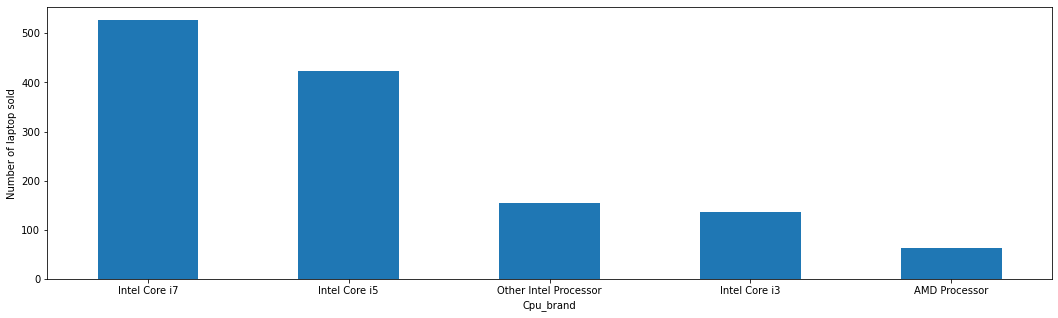

In [35]:
# Cpu_brand
ax=df["Cpu_brand"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Cpu_brand")
plt.ylabel("Number of laptop sold")
plt.show()

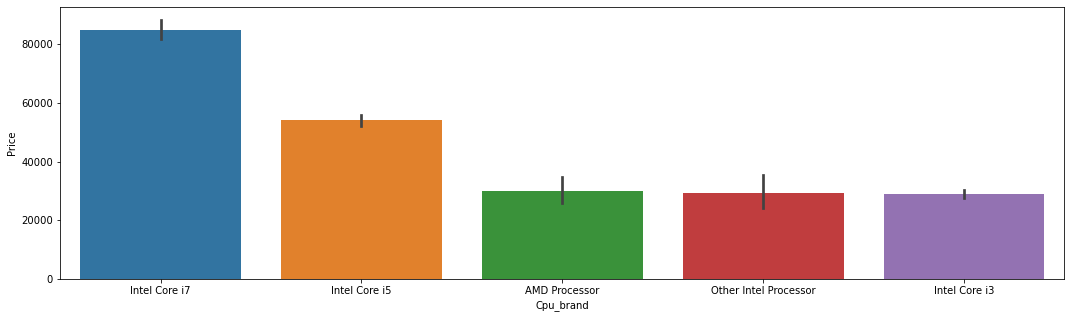

In [36]:
# Cpu_brand with Target
order = df.groupby(["Cpu_brand"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x='Cpu_brand', y='Price', data=df, order=order)
plt.show()

The graph shows the price of i7 processor is high, then of i5 processor, i3 and AMD processor lies at the almost the same range. Hence price will depend on the preprocessor.

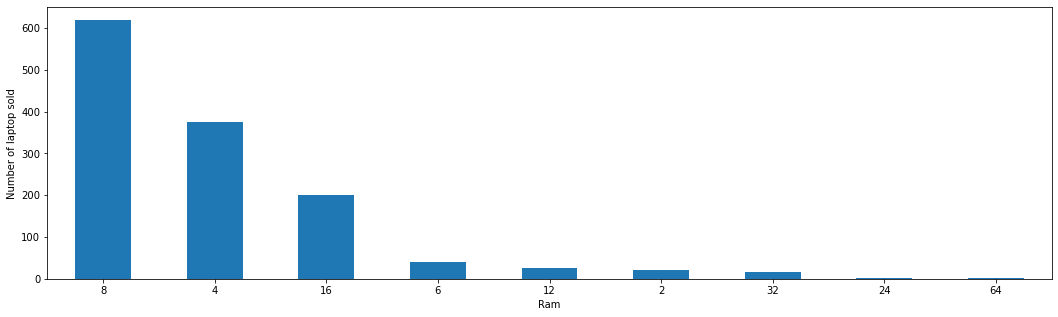

In [37]:
# Ram
ax=df["Ram"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Ram")
plt.ylabel("Number of laptop sold")
plt.show()

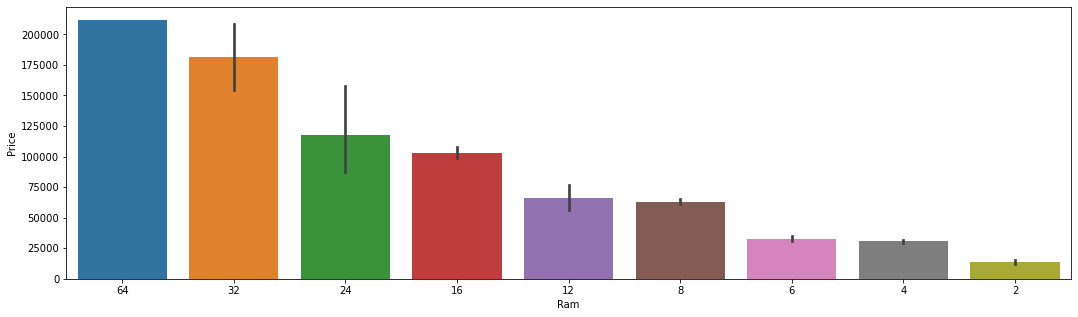

In [38]:
# Ram with Target
order = df.groupby(["Ram"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x="Ram",y="Price",data=df,order=order)
plt.show()

The graph shows a linear relationship and Price is having a very strong positive correlation with Ram.

In [39]:
# Memory column
print(df["Memory"].value_counts())
print(df["Memory"].nunique())

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

There asre 4 different categories of memory as HHD, SSD, Flash storage, and hybrid.

In [40]:
df['Memory'] = df['Memory'].astype(str).replace('.0', '', regex=True) #removing .0 value and converting Memory column to string type
# converting memory size to GB 
df["Memory"] = df["Memory"].str.replace('GB', '') 
df["Memory"] = df["Memory"].str.replace('TB', '000') # 1GB = 1,000TB
# Splitting Memory column to 2 columns
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new[0]
df["first"]=df["first"].str.strip() # deleting spaces
df["second"]= new[1]

# Dealing with first column
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0) # any row contains HDD will replace to 1 others 0
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0) # any row contains SDD will replace to 1 others 0
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0) # any row contains Hybrid will replace to 1 others 0
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0) # any row contains Flash Storage will replace to 1 others 0
#only keep integert(digits)
def keep_numbers(cell):
    return re.sub('[^0-9\.]', '', cell)
df['first'] = df['first'].apply(keep_numbers).replace("","0")

# Dealing with second column
df["second"].fillna("0", inplace = True) # filling missing values with 0
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0) # any row contains HDD will replace to 1 others 0
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0) # any row contains SDD will replace to 1 others 0
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0) # any row contains Hybrid will replace to 1 others 0
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0) # any row contains Flash Storage will replace to 1 others 0
#only keep integert(digits)
def keep_numbers(cell):
    return re.sub('[^0-9\.]', '', cell)
df['second'] = df['second'].apply(keep_numbers).replace("","0")

# Converting columns type to integer
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# finalize the columns by keeping value
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

#Drop the un required columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [41]:
df.corr()["Price"].sort_values(ascending=False)

Price            1.000000
Ram              0.743007
SSD              0.666734
ppi              0.473487
IPS              0.252208
Weight           0.210370
Touchscreen      0.191226
Hybrid           0.008811
HDD             -0.026830
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [42]:
#dropping unecessiry columns with CPU and memory which is no longer required
df.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [43]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [44]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [45]:
#there is only 1 row of ARM GPU so remove it, and then removing Gpu column
df = df[df['Gpu_brand'] != 'ARM']
df.drop(columns=['Gpu'],inplace=True)

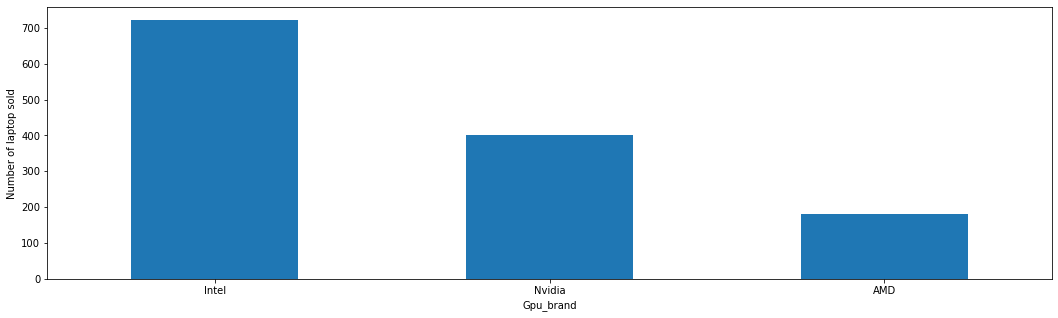

In [46]:
ax=df["Gpu_brand"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Gpu_brand")
plt.ylabel("Number of laptop sold")
plt.show()

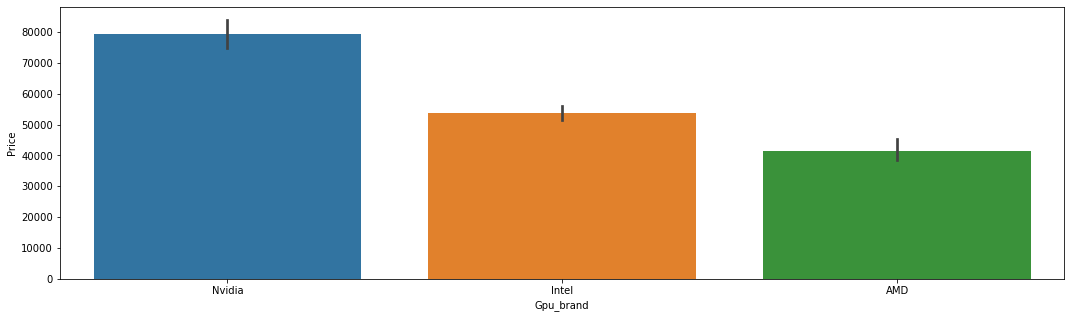

In [47]:
# Gpu prand with Target
order = df.groupby(["Gpu_brand"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x="Gpu_brand",y="Price",data=df,order=order)
plt.show()

Intel Gpu is the most selling, because it is in the budget range

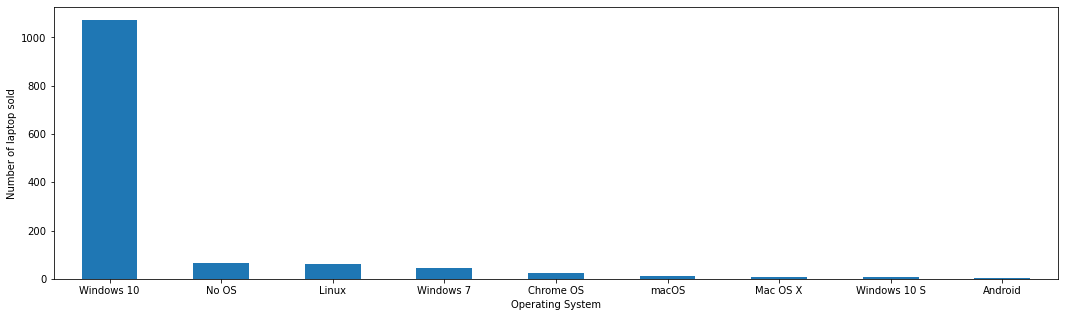

In [48]:
# Operating System Column
ax=df["OpSys"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Operating System")
plt.ylabel("Number of laptop sold")
plt.show()

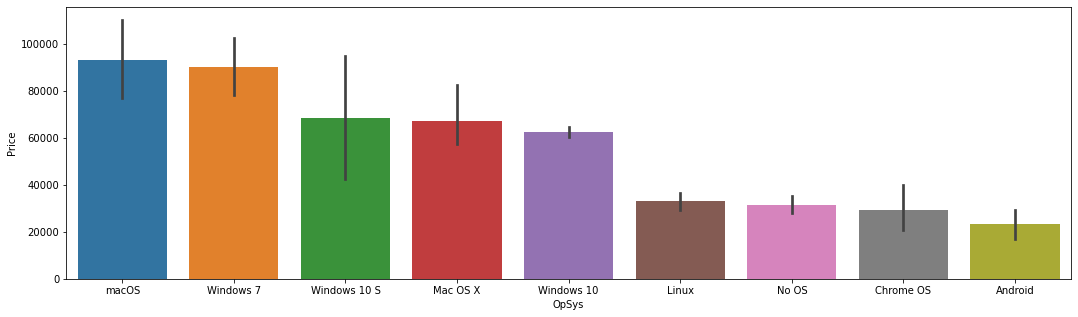

In [49]:
# Operating System with Target
order = df.groupby(["OpSys"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x="OpSys",y="Price",data=df,order=order)
plt.show()

In [50]:
def cat_os(inp):
    if inp == "Windows 10" or inp== "Windows 7" or inp== "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "Mac"
    else:
        return ""
    

In [51]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os'] = df['OpSys'].apply(cat_os)
df.drop(columns=['OpSys'],inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


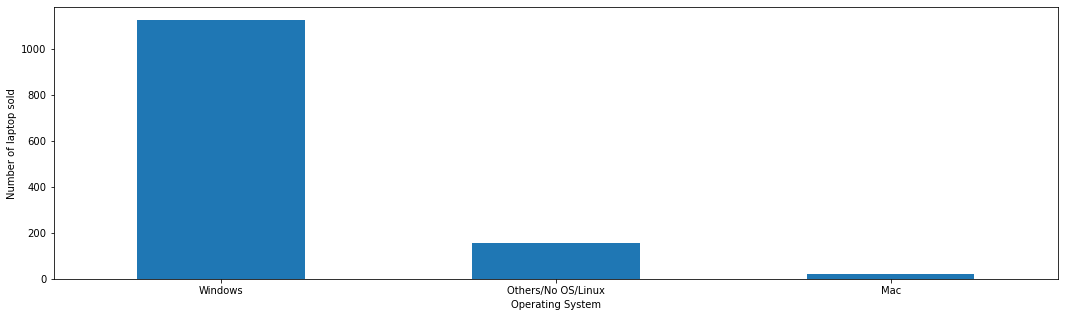

In [53]:
# Operating System Column
ax=df["os"].value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Operating System")
plt.ylabel("Number of laptop sold")
plt.show()

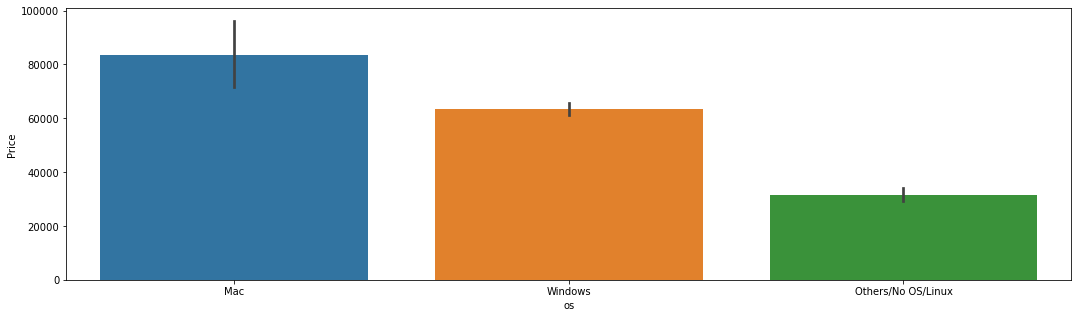

In [54]:
order = df.groupby(["os"])["Price"].mean().sort_values(ascending=False).index
sns.barplot(x="os",y="Price",data=df,order=order)
plt.show()

Mac is the most expensive, and Windows is the most selling 

#### Log-Normal Transformation (Price)
The distribution of the target variable is right-skewed. So, it will be transformed to normal distribution to increase the performance of the algorithm by taking the log of values that transform to the normal distribution.

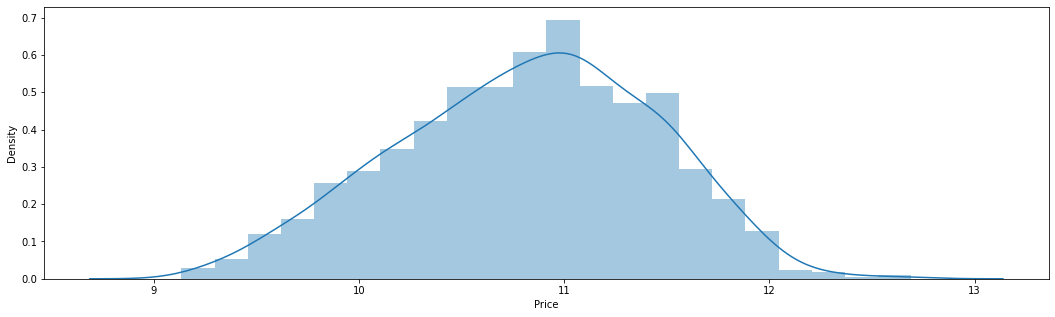

In [55]:
sns.distplot(np.log(df['Price']))
plt.show()

In [56]:
df.to_csv("new_laptop_data.csv")